# Setup

Clone GitHub [repository](https://github.com/ultralytics/yolov5), install [dependencies](https://github.com/ultralytics/yolov5/blob/master/requirements.txt) and check PyTorch and GPU.

In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt comet_ml  # install

import torch
import utils
display = utils.notebook_init()

YOLOv5 🚀 v7.0-339-g150a1a31 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.3/78.2 GB disk)


In [ ]:
!nvidia-smi

Thu Jul 11 13:29:53 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8              12W /  70W |      3MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import zipfile
import os

# Path to the zip file
zip_file_path = '/content/New_data.zip'

# Directory where the zip file will be extracted
extract_dir = '/content/images'

# Create the directory if it does not exist
os.makedirs(extract_dir, exist_ok=True)

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print(f'Files extracted to {extract_dir}')

BadZipFile: File is not a zip file

# Train a yolov5n baseline model - 60 epochs  

In [ ]:
!python train.py --batch 32 --epochs 60 --data /content/drone_and_uav_config.yaml --weights yolov5n.pt --cache

2024-07-10 15:07:20.340563: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-10 15:07:20.340622: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-10 15:07:20.459498: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5n.pt, cfg=, data=/content/drone_and_uav_config.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=60, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False,

# Train a yolov5n - 60 epochs - custom hyperparameters
/content/hyp.custom.yaml


```
lr0: 0.01 # initial learning rate (SGD=1E-2, Adam=1E-3)
lrf: 0.01 # final OneCycleLR learning rate (lr0 * lrf)
momentum: 0.937 # SGD momentum/Adam beta1
weight_decay: 0.0005 # optimizer weight decay 5e-4
warmup_epochs: 3.0 # warmup epochs (fractions ok)
warmup_momentum: 0.8 # warmup initial momentum
warmup_bias_lr: 0.1 # warmup initial bias lr
box: 0.05 # box loss gain
cls: 0.5 # cls loss gain
cls_pw: 1.0 # cls BCELoss positive_weight
obj: 1.0 # obj loss gain (scale with pixels)
obj_pw: 1.0 # obj BCELoss positive_weight
iou_t: 0.20 # IoU training threshold
anchor_t: 4.0 # anchor-multiple threshold
# anchors: 3  # anchors per output layer (0 to ignore)
fl_gamma: 0.0 # focal loss gamma (efficientDet default gamma=1.5)
hsv_h: 0.015 # image HSV-Hue augmentation (fraction)
hsv_s: 0.7 # image HSV-Saturation augmentation (fraction)
hsv_v: 0.4 # image HSV-Value augmentation (fraction)
degrees: 180.0 # image rotation (+/- deg)
translate: 0.5 # image translation (+/- fraction)
scale: 0.9 # image scale (+/- gain)
shear: 0.45 # image shear (+/- deg)
perspective: 0.0 # image perspective (+/- fraction), range 0-0.001
flipud: 0.5 # image flip up-down (probability)
fliplr: 0.5 # image flip left-right (probability)
mosaic: 1.0 # image mosaic (probability)
mixup: 0.5 # image mixup (probability)
copy_paste: 0.5 # segment copy-paste (probability)

```
by creating this file and passing it in the train we can specify what will be the model hyperparameters


```

!python train.py --batch 32 --epochs 60 --data /content/drone_and_uav_config.yaml --hyp hyp.custom.yaml --weights yolov5n.pt --cache
```

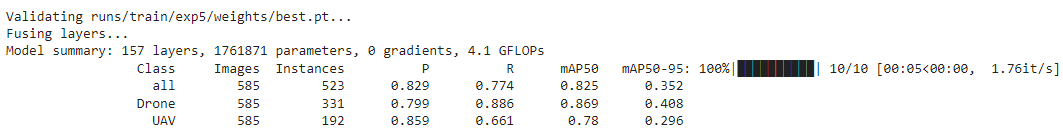

these results are from 60 epochs on our data

In [ ]:
# Train YOLOv5s on drone_and_uav_config for 1 epochs
!python train.py --batch 32 --epochs 20 --data /content/drone_and_uav_config.yaml --hyp hyp.custom.yaml --weights yolov5n.pt --cache

2024-07-08 17:57:58.372836: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-08 17:57:58.372885: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-08 17:57:58.374294: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5n.pt, cfg=, data=/content/drone_and_uav_config.yaml, hyp=hyp.custom.yaml, epochs=20, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=Fal

In [ ]:
!zip -r /content/exp_1.zip /content/yolov5/runs/train/exp

  adding: content/yolov5/runs/train/exp/ (stored 0%)
  adding: content/yolov5/runs/train/exp/labels_correlogram.jpg (deflated 34%)
  adding: content/yolov5/runs/train/exp/train_batch1.jpg (deflated 10%)
  adding: content/yolov5/runs/train/exp/val_batch1_labels.jpg (deflated 7%)
  adding: content/yolov5/runs/train/exp/results.png (deflated 7%)
  adding: content/yolov5/runs/train/exp/val_batch1_pred.jpg (deflated 7%)
  adding: content/yolov5/runs/train/exp/train_batch2.jpg (deflated 7%)
  adding: content/yolov5/runs/train/exp/F1_curve.png (deflated 12%)
  adding: content/yolov5/runs/train/exp/val_batch0_labels.jpg (deflated 16%)
  adding: content/yolov5/runs/train/exp/P_curve.png (deflated 11%)
  adding: content/yolov5/runs/train/exp/val_batch0_pred.jpg (deflated 15%)
  adding: content/yolov5/runs/train/exp/opt.yaml (deflated 49%)
  adding: content/yolov5/runs/train/exp/labels.jpg (deflated 27%)
  adding: content/yolov5/runs/train/exp/events.out.tfevents.1720461481.1e321057b9c7.8170.0 (d

In [ ]:
from google.colab import files
files.download("/content/exp_1.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!python detect.py --weights  /content/yolov5/runs/train/exp/weights/best.pt  --source /content/uav.mp4

detect: weights=['/content/yolov5/runs/train/exp/weights/best.pt'], source=/content/uav.mp4, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-335-g40f490d9 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 1761871 parameters, 0 gradients, 4.1 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
video 1/1 (1/223) /content/uav.mp4: 640x576 1 Drone, 47.6ms
video 1/1 (2/223) /content/uav.mp4: 640x576 1 UAV, 6.0ms
video 1/1 (3/223) /content/uav.mp4: 640x576 1 Drone, 5.5ms
video 1/1 (4/223) /content/uav.mp4: 640x576 1 Drone, 5.3ms
video 1/1 (5/223) /content/uav.mp4: 640x

In [ ]:
!python train.py --batch 32 --epochs 20 --data /content/drone_and_uav_config.yaml --hyp hyp.custom.yaml --weights /content/yolov5/runs/train/exp/weights/best.pt --cache

2024-07-08 18:29:44.854890: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-08 18:29:44.854946: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-08 18:29:44.856386: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=/content/yolov5/runs/train/exp/weights/best.pt, cfg=, data=/content/drone_and_uav_config.yaml, hyp=hyp.custom.yaml, epochs=20, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=ram, image_weights=False, device

In [ ]:
!zip -r /content/exp_2.zip /content/yolov5/runs/train/exp2

  adding: content/yolov5/runs/train/exp2/ (stored 0%)
  adding: content/yolov5/runs/train/exp2/labels_correlogram.jpg (deflated 34%)
  adding: content/yolov5/runs/train/exp2/train_batch1.jpg (deflated 10%)
  adding: content/yolov5/runs/train/exp2/val_batch1_labels.jpg (deflated 7%)
  adding: content/yolov5/runs/train/exp2/results.png (deflated 6%)
  adding: content/yolov5/runs/train/exp2/val_batch1_pred.jpg (deflated 7%)
  adding: content/yolov5/runs/train/exp2/train_batch2.jpg (deflated 7%)
  adding: content/yolov5/runs/train/exp2/F1_curve.png (deflated 12%)
  adding: content/yolov5/runs/train/exp2/val_batch0_labels.jpg (deflated 16%)
  adding: content/yolov5/runs/train/exp2/P_curve.png (deflated 11%)
  adding: content/yolov5/runs/train/exp2/val_batch0_pred.jpg (deflated 15%)
  adding: content/yolov5/runs/train/exp2/opt.yaml (deflated 49%)
  adding: content/yolov5/runs/train/exp2/labels.jpg (deflated 27%)
  adding: content/yolov5/runs/train/exp2/events.out.tfevents.1720463387.1e321057

In [ ]:
from google.colab import files
files.download("/content/exp_2.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!python train.py --batch 32 --epochs 20 --data /content/drone_and_uav_config.yaml --hyp hyp.custom.yaml --weights /content/yolov5/runs/train/exp2/weights/best.pt --cache

2024-07-08 19:00:07.506640: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-08 19:00:07.506684: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-08 19:00:07.508226: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=/content/yolov5/runs/train/exp2/weights/best.pt, cfg=, data=/content/drone_and_uav_config.yaml, hyp=hyp.custom.yaml, epochs=20, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=ram, image_weights=False, devic

In [ ]:
!zip -r /content/exp_3.zip /content/yolov5/runs/train/exp3

  adding: content/yolov5/runs/train/exp3/ (stored 0%)
  adding: content/yolov5/runs/train/exp3/labels_correlogram.jpg (deflated 34%)
  adding: content/yolov5/runs/train/exp3/train_batch1.jpg (deflated 10%)
  adding: content/yolov5/runs/train/exp3/val_batch1_labels.jpg (deflated 7%)
  adding: content/yolov5/runs/train/exp3/results.png (deflated 6%)
  adding: content/yolov5/runs/train/exp3/val_batch1_pred.jpg (deflated 7%)
  adding: content/yolov5/runs/train/exp3/train_batch2.jpg (deflated 7%)
  adding: content/yolov5/runs/train/exp3/events.out.tfevents.1720465210.1e321057b9c7.24104.0 (deflated 31%)
  adding: content/yolov5/runs/train/exp3/F1_curve.png (deflated 12%)
  adding: content/yolov5/runs/train/exp3/val_batch0_labels.jpg (deflated 16%)
  adding: content/yolov5/runs/train/exp3/P_curve.png (deflated 12%)
  adding: content/yolov5/runs/train/exp3/val_batch0_pred.jpg (deflated 15%)
  adding: content/yolov5/runs/train/exp3/opt.yaml (deflated 49%)
  adding: content/yolov5/runs/train/exp

In [ ]:
from google.colab import files
files.download("/content/exp_3.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!python train.py --batch 32 --epochs 40 --data /content/drone_and_uav_config.yaml --hyp hyp.custom.yaml --weights /content/yolov5/runs/train/exp3/weights/best.pt --cache

2024-07-08 20:02:01.348949: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-08 20:02:01.349008: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-08 20:02:01.350394: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=/content/yolov5/runs/train/exp3/weights/best.pt, cfg=, data=/content/drone_and_uav_config.yaml, hyp=hyp.custom.yaml, epochs=40, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=ram, image_weights=False, devic

In [ ]:
!zip -r /content/exp_4.zip /content/yolov5/runs/train/exp5

  adding: content/yolov5/runs/train/exp5/ (stored 0%)
  adding: content/yolov5/runs/train/exp5/labels_correlogram.jpg (deflated 34%)
  adding: content/yolov5/runs/train/exp5/train_batch1.jpg (deflated 10%)
  adding: content/yolov5/runs/train/exp5/val_batch1_labels.jpg (deflated 7%)
  adding: content/yolov5/runs/train/exp5/events.out.tfevents.1720468923.1e321057b9c7.39998.0 (deflated 31%)
  adding: content/yolov5/runs/train/exp5/results.png (deflated 6%)
  adding: content/yolov5/runs/train/exp5/val_batch1_pred.jpg (deflated 7%)
  adding: content/yolov5/runs/train/exp5/train_batch2.jpg (deflated 7%)
  adding: content/yolov5/runs/train/exp5/F1_curve.png (deflated 12%)
  adding: content/yolov5/runs/train/exp5/val_batch0_labels.jpg (deflated 16%)
  adding: content/yolov5/runs/train/exp5/P_curve.png (deflated 12%)
  adding: content/yolov5/runs/train/exp5/val_batch0_pred.jpg (deflated 15%)
  adding: content/yolov5/runs/train/exp5/opt.yaml (deflated 49%)
  adding: content/yolov5/runs/train/exp

In [ ]:
!zip -r /content/exp_5.zip /content/yolov5/runs/evolve/exp3

# changing the model architecture

### Explanation of YOLOv5 Layers

1. **Conv (Convolutional Layer)**:
   - A standard convolutional layer that applies a set of filters to the input image or feature map to extract features. It consists of learnable kernels that perform convolution operations.

2. **GhostConv (Ghost Convolution)**:
   - An efficient version of the convolutional layer that reduces the number of parameters and computational cost by generating more feature maps with fewer computations.

3. **Bottleneck**:
   - A layer that reduces the number of parameters and computations by compressing and then expanding the feature maps. It typically involves a sequence of 1x1 and 3x3 convolutions.

4. **GhostBottleneck**:
   - A combination of GhostConv and Bottleneck. It aims to achieve high efficiency by combining the ghost convolution and bottleneck structure to reduce parameters and computations further.

5. **SPP (Spatial Pyramid Pooling)**:
   - A pooling layer that pools features at multiple scales and concatenates them. It allows the network to handle different object scales and sizes more effectively.

6. **SPPF (Simplified SPP)**:
   - A simplified version of SPP that performs similar multi-scale pooling but with reduced computational complexity.

7. **DWConv (Depthwise Convolution)**:
   - A type of convolution where each input channel is convolved with a separate filter, reducing the number of parameters and computations compared to standard convolutions.

8. **MixConv2d (Mixed Convolution)**:
   - A layer that applies different kernel sizes within the same convolutional layer, capturing features at multiple scales simultaneously.

9. **Focus**:
   - A custom layer in YOLOv5 that slices the input feature map into smaller patches and concatenates them along the channel dimension. This helps in capturing fine-grained details.

10. **CrossConv**:
    - A convolutional layer with cross-connections that combine information from multiple sources, enhancing the feature representation.

11. **BottleneckCSP (Bottleneck Cross Stage Partial)**:
    - An enhanced bottleneck layer with partial connections that improve gradient flow and reduce computation by splitting and merging feature maps.

12. **C3 (Cross Stage Partial Network)**:
    - A layer that combines the advantages of Cross Stage Partial connections and bottleneck structures, designed to improve feature reuse and gradient flow.

13. **C3TR (Transformer Enhanced C3)**:
    - A variation of the C3 layer that integrates transformer-based mechanisms for capturing long-range dependencies and enhancing feature extraction.

14. **C3SPP (C3 with SPP)**:
    - Combines the C3 layer with Spatial Pyramid Pooling to benefit from both dense connections and multi-scale feature extraction.

15. **C3Ghost**:
    - Combines the C3 layer with Ghost Convolutions to reduce computational complexity while maintaining efficient feature extraction.

16. **nn.ConvTranspose2d (Transposed Convolutional Layer)**:
    - A layer used for upsampling feature maps, also known as deconvolution. It increases the spatial resolution of the feature maps.

17. **DWConvTranspose2d (Depthwise Transposed Convolution)**:
    - An efficient upsampling layer that applies depthwise transposed convolutions to increase the spatial resolution with fewer parameters.

18. **C3x**:
    - An extended version of the C3 layer, possibly with additional modifications or enhancements for specific tasks.



## Differnt Expriments

### C3TR


In [ ]:
!python train.py --batch 32 --epochs 60 --data /content/drone_and_uav_config.yaml --cfg /content/yolov5n__C3TR_insted_of_c3.yaml --cache

2024-07-11 07:45:27.973083: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-11 07:45:27.973132: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-11 07:45:27.974732: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=/content/yolov5n__C3TR_insted_of_c3.yaml, data=/content/drone_and_uav_config.yaml, hyp=/content/hyp.custom.yaml, epochs=60, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=ram, image_weights=

In [ ]:
!python train.py --batch 32 --epochs 60 --data /content/drone_and_uav_config.yaml --cfg /content/yolov5n__C3TR_insted_of_c3.yaml --hyp /content/hyp.custom.yaml --cache

### Ghost C3 and GhostConv


In [ ]:
!python train.py --batch 32 --epochs 60 --data /content/drone_and_uav_config.yaml --cfg /content/ghost_c3_and_conv.yaml --cache

In [ ]:
!python train.py --batch 32 --epochs 60 --data /content/drone_and_uav_config.yaml --hyp /content/hyp.custom.yaml --cfg /content/ghost_c3_and_conv.yaml --cache

### Focus


In [ ]:
!python train.py --batch 32 --epochs 60 --data /content/drone_and_uav_config.yaml --cfg /content/yolo5n_with_focus.yaml --cache

In [ ]:
!python train.py --batch 32 --epochs 60 --data /content/drone_and_uav_config.yaml --hyp /content/hyp.custom.yaml --cfg /content/yolo5n_with_focus.yaml --cache

### Combining the best candidates

In [ ]:
!python train.py --batch 32 --epochs 60 --data /content/drone_and_uav_config.yaml --cfg /content/ghost_c3_and_conv_focus.yaml --cache

2024-07-11 09:44:07.554685: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-11 09:44:07.554746: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-11 09:44:07.556211: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=/content/ghost_c3_and_conv_focus.yaml, data=/content/drone_and_uav_config.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=60, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=ram, image_weigh